### Customer Churn Prediction

In [81]:
import pandas as pd
import numpy as np

In [82]:
df =pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [84]:
# dropping cols
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)


In [85]:
df =pd.get_dummies(df, columns =["Geography", "Gender"], drop_first =True)

In [86]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [87]:
X =df.drop(columns=["Exited"])
y =df["Exited"]

### Train Test Split

In [88]:
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=1)

### Scaling

In [89]:
from sklearn.preprocessing import StandardScaler
s =StandardScaler()
X_tain_scaled =s.fit_transform(X_train)
X_test_scaled =s.transform(X_test)

In [90]:
X_tain_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [91]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

### Model Building

In [92]:
model =Sequential()
model.add(Dense(3, activation='sigmoid', input_dim =11))
model.add(Dense(1, activation='sigmoid'))


c:\Users\faiqi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [93]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [94]:
model.compile(loss='binary_crossentropy', optimizer='Adam')

In [95]:
model.fit(X_tain_scaled, y_train, epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.9021
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 0.6726
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5575
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5026
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4715
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4639
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4612
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4563
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4445
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4420


In [96]:
model.layers[0].get_weights()

[array([[-0.1636664 , -0.13195166,  0.03119836],
        [ 0.41115224,  1.457297  , -1.2421162 ],
        [ 0.07724941, -0.13270137,  0.06229157],
        [ 0.16451171,  0.09487082, -0.12998883],
        [-0.7256718 ,  0.17610106,  0.6969951 ],
        [-0.3020904 , -0.26913676, -0.07278162],
        [ 0.10274815, -0.78850806,  0.8583044 ],
        [ 0.4564666 ,  0.04368868,  0.02802591],
        [ 0.6932298 ,  0.8961449 , -0.50600874],
        [ 0.42814878,  0.09342971,  0.09713301],
        [-0.07333696, -0.43887642,  0.44092867]], dtype=float32),
 array([-0.45761693, -0.6249668 ,  1.1463886 ], dtype=float32)]

In [97]:
model.layers[1].get_weights()

[array([[ 0.08430712],
        [ 0.7681469 ],
        [-1.4160842 ]], dtype=float32),
 array([-0.82341594], dtype=float32)]

In [98]:
y_ =model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [99]:
y_pred =np.where(y_>=0.5, 1, 0)

In [100]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [101]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7935

### Trying to get Better Accuracy

In [102]:
model =Sequential()
model.add(Dense(11, activation="relu", input_dim =11))
model.add(Dense(11, activation="relu",))
model.add(Dense(1, activation="sigmoid"))

c:\Users\faiqi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [103]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# accuracy for both training and validation
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [105]:

hisoty =model.fit(X_tain_scaled, y_train, epochs=100, validation_split = 0.2)

Epoch 1/100


200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6253 - loss: 0.6543 - val_accuracy: 0.8000 - val_loss: 0.4950
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8171 - loss: 0.4604 - val_accuracy: 0.8206 - val_loss: 0.4365
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8258 - loss: 0.4212 - val_accuracy: 0.8238 - val_loss: 0.4215
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8315 - loss: 0.4028 - val_accuracy: 0.8244 - val_loss: 0.4118
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8313 - loss: 0.4065 - val_accuracy: 0.8275 - val_loss: 0.4017
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8450 - loss: 0.3856 - val_accuracy: 0.8281 - val_loss: 0.3920
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8397 - loss: 0.3914 - val_accuracy: 0.8331 - val_loss: 0.3827
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8385 - loss: 0.3799 - val_accuracy: 0.8388

In [75]:
y_ =model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [77]:
y_ =np.where(y_>=0.5, 1, 0)

In [78]:
accuracy_score(y_test, y_)

0.8625

In [79]:
history

import pandas as pd
import numpy as np
df =pd.read_csv("Churn_Modelling.csv")
df
df.info()
# dropping cols
df.drop(columns=["RowNumber", "CusomerId". ])
# dropping cols
df.drop(columns=["RowNumber", "CusomerId", "Surname"], inplace=True)
# dropping cols
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)
df =df.get_dummies(df, columns =["Geography", "Gender"], drop_first =True)
df =pd.get_dummies(df, columns =["Geography", "Gender"], drop_first =True)
df
X =df.drop(columns=["Exited"])
y =df["Exited"]
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=1)
from sklearn.preprocessing import StandardScaler
s =StandardScaler()
X_tain_scaled =s.fit_transform(X_train)
X_test_scaled =s.transform(X_test)
X_tain_scaled
import tensorflow
from tensorflow import keras
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
import tensorflow
from tensor

In [107]:
import matplotlib.pyplot as plt

In [110]:
hisoty.history

{'accuracy': [0.7256249785423279,
  0.8137500286102295,
  0.8268749713897705,
  0.8307812213897705,
  0.835156261920929,
  0.83984375,
  0.8421875238418579,
  0.8448437452316284,
  0.8492187261581421,
  0.8500000238418579,
  0.850781261920929,
  0.8564062714576721,
  0.8568750023841858,
  0.8557812571525574,
  0.8582812547683716,
  0.8581249713897705,
  0.8579687476158142,
  0.8603125214576721,
  0.8589062690734863,
  0.8606250286102295,
  0.8628125190734863,
  0.8626562356948853,
  0.8620312213897705,
  0.862500011920929,
  0.8653125166893005,
  0.8656250238418579,
  0.8643749952316284,
  0.8656250238418579,
  0.864062488079071,
  0.8651562333106995,
  0.8673437237739563,
  0.8670312762260437,
  0.8645312786102295,
  0.8659374713897705,
  0.867968738079071,
  0.8687499761581421,
  0.8673437237739563,
  0.8673437237739563,
  0.8682812452316284,
  0.8692187666893005,
  0.8670312762260437,
  0.8692187666893005,
  0.8681250214576721,
  0.8675000071525574,
  0.8678125143051147,
  0.8670312

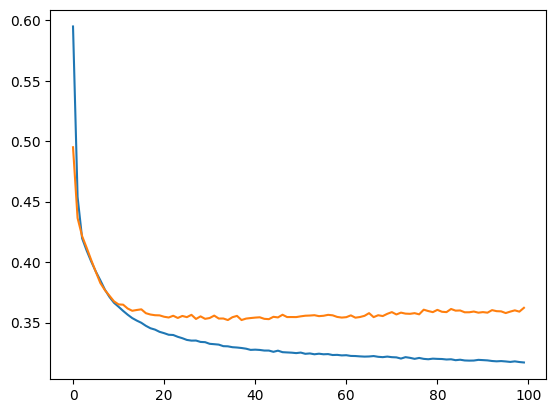

In [ ]:
# Loss of Training data vs validation data
plt.plot(hisoty.history["loss"])
plt.plot(hisoty.history["val_loss"])

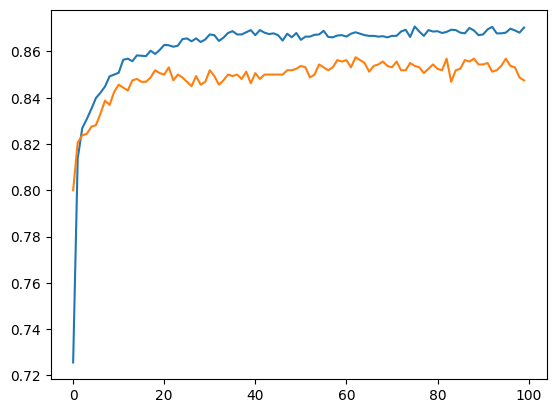

In [113]:
plt.plot(hisoty.history["accuracy"])
plt.plot(hisoty.history["val_accuracy"])